# Inspect cross-validation results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.style.use("huddlej")

In [2]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

In [3]:
df = pd.read_table("model_validation.tab", keep_default_na=False, na_values="N/A")

IOError: File model_validation.tab does not exist

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictors").aggregate({
    "testing_accuracy": agg_functions,
    "mae": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("mae", "mean")]), 3)

In [4]:
sns.lmplot("test_timepoint", "mae", col="predictors", data=df, col_wrap=2, height=7, aspect=1.3)

NameError: name 'df' is not defined

In [5]:
sns.catplot(
    "predictors",
    "mae",
    hue="test_timepoint",
    data=df,
    kind="swarm",
    height=7,
    aspect=1.7
)

NameError: name 'df' is not defined

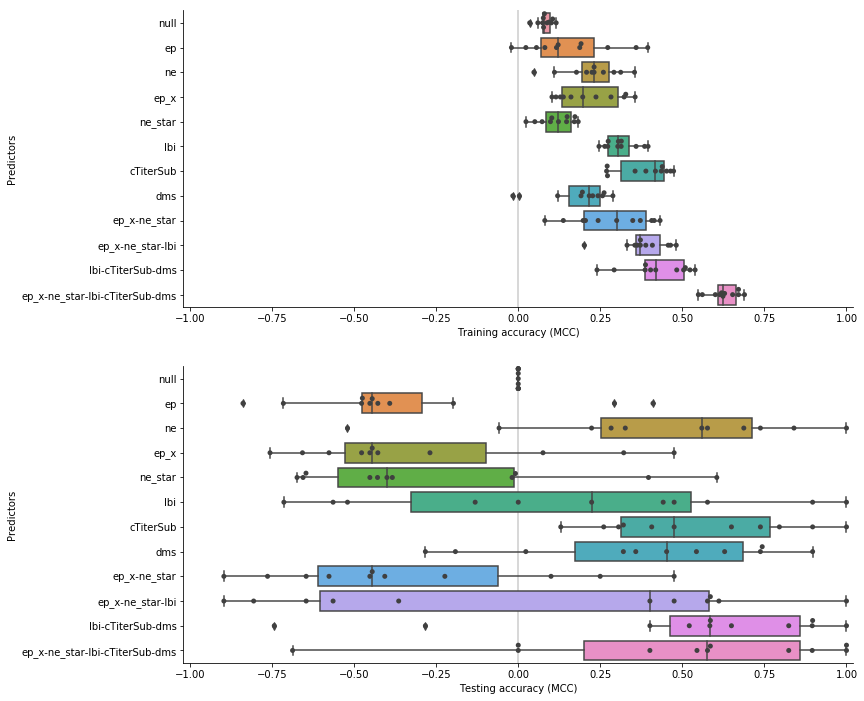

In [166]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training correlation on the top panel.
sns.boxplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training correlation (Pearson's R)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing correlation on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing correlation (Pearson's R)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="mae",
    data=df,
    ax=ax
)
sns.swarmplot(
    y="predictors",
    x="mae",
    data=df,
    ax=ax,
    color="0.25"
)

ax.set_xlabel("Mean absolute error")
ax.set_ylabel("Predictors")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

In [71]:
df["predictors"].unique()

array(['null', 'ep', 'ne', 'ep_x', 'ne_star', 'lbi', 'cTiterSub', 'dms',
       'ep_x-ne_star', 'ep_x-ne_star-lbi', 'lbi-cTiterSub-dms',
       'ep_x-ne_star-lbi-cTiterSub-dms'], dtype=object)

In [79]:
parameter_columns = [column for column in df.columns if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").aggregate(["mean", "std"])

parameter-cTiterSub           parameter-dms  \
                                              mean       std          mean   
predictors                                                                   
cTiterSub                                 0.576261  0.333535           NaN   
dms                                            NaN       NaN      0.253746   
ep                                             NaN       NaN           NaN   
ep_x                                           NaN       NaN           NaN   
ep_x-ne_star                                   NaN       NaN           NaN   
ep_x-ne_star-lbi                               NaN       NaN           NaN   
ep_x-ne_star-lbi-cTiterSub-dms            0.972800  0.233975      0.209915   
lbi                                            NaN       NaN           NaN   
lbi-cTiterSub-dms                         0.952180  0.280802      0.080749   
ne                                             NaN       NaN           NaN   
ne_star                                        NaN       NaN           NaN   
null                                           NaN       NaN           NaN   

                                         parameter-ep            \
                                     std         mean       std   
predictors                                                        
cTiterSub                            NaN          NaN       NaN   
dms                             0.282819          NaN       NaN   
ep                                   NaN     0.364159  0.721343   
ep_x                                 NaN          NaN       NaN   
ep_x-ne_star                         NaN          NaN       NaN   
ep_x-ne_star-lbi                     NaN          NaN       NaN   
ep_x-ne_star-lbi-cTiterSub-dms  0.548323          NaN       NaN   
lbi                                  NaN          NaN       NaN   
lbi-cTiterSub-dms               0.630316          NaN       NaN   
ne                                   NaN          NaN       NaN   
ne_star                              NaN          NaN       NaN   
null                                 NaN          NaN       NaN   

                               parameter-ep_x           parameter-lbi  \
                                         mean       std          mean   
predictors                                                              
cTiterSub                                 NaN       NaN           NaN   
dms                                       NaN       NaN           NaN   
ep                                        NaN       NaN           NaN   
ep_x                                 1.001901  0.769374           NaN   
ep_x-ne_star                         1.349370  1.109979           NaN   
ep_x-ne_star-lbi                     0.765137  0.655802      0.577023   
ep_x-ne_star-lbi-cTiterSub-dms       1.215106  0.789754      0.897235   
lbi                                       NaN       NaN      0.399903   
lbi-cTiterSub-dms                         NaN       NaN      0.487347   
ne                                        NaN       NaN           NaN   
ne_star                                   NaN       NaN           NaN   
null                                      NaN       NaN           NaN   

                                         parameter-ne            \
                                     std         mean       std   
predictors                                                        
cTiterSub                            NaN          NaN       NaN   
dms                                  NaN          NaN       NaN   
ep                                   NaN          NaN       NaN   
ep_x                                 NaN          NaN       NaN   
ep_x-ne_star                         NaN          NaN       NaN   
ep_x-ne_star-lbi                0.297438          NaN       NaN   
ep_x-ne_star-lbi-cTiterSub-dms  0.293797          NaN       NaN   
lbi                             0.190598          NaN       NaN   
lbi-cTiterSub-dms    

In [123]:
parameters_df = df.loc[:, ["predictors"] + parameter_columns].melt(
    "predictors",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [126]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

In [127]:
parameters_df.head()

,predictors,predictor,parameter
66,cTiterSub,cTiterSub,-0.002188
67,cTiterSub,cTiterSub,0.020439
68,cTiterSub,cTiterSub,0.205096
69,cTiterSub,cTiterSub,0.638125
70,cTiterSub,cTiterSub,0.687128


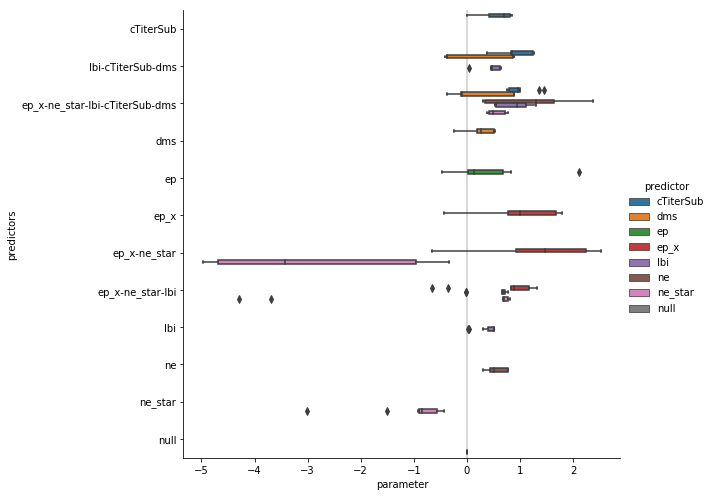

In [132]:
g = sns.catplot(
    y="predictors",
    x="parameter",
    data=parameters_df,
    hue="predictor",
    kind="box",
    height=7,
    aspect=1.3,
    dodge=1
)
g.ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

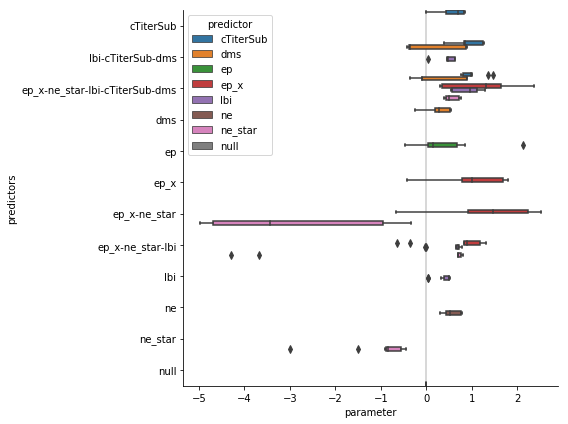

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(
    y="predictors",
    x="parameter",
    data=parameters_df,
    hue="predictor",
    ax=ax,
    width=1.0,
    dodge=1.0
)
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
sns.despine()
plt.tight_layout()

In [152]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn    124
fp    110
tn    251
tp    320
dtype: int64

In [153]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

805

In [154]:
(251+320) / 805.0

0.7093167701863354

In [155]:
df[df["predictors"] == "cTiterSub"]["testing_accuracy"].mean()

0.5046847156124517

In [156]:
df[df["predictors"] == "cTiterSub"]["testing_accuracy"].median()

0.4892460547900817